In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

<font size=6>
    Sberbank Russian Housing Market
</font>

<hr style="border: solid rgb(0,0,0) 0.0px; background-color: rgb(0,0,0);height: 2.0px;"/>
<font color='red' size=5>
    The show so far ... 
</font>


**Summary**

Outlier detection in the categorical feature


<hr style="border: solid rgb(0,0,0) 0.0px; background-color: rgb(0,0,0);height: 2.0px;"/>

In [2]:
# This will reload imports before executing code, allowing you to easily change contents of custom scripts
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [4]:
import os

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import random
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, 20)]
random.shuffle(colors)

In [6]:
#import importlib
import sys
sys.path.append('./helpers/')

## Load the data

In [7]:
df = pd.read_csv('../../datasets/sberbank-russian-housing-market/train.csv', \
                 infer_datetime_format=True, parse_dates=['timestamp'])

In [8]:
df.shape

(30471, 292)

## Preprocess the data

### Drop features

#### Characterize the missing values

In [9]:
from helpers.fill_rates import get_column_fill_rates, get_row_fill_rates

#### Separate some features based on type and/or use

**Note** the target feature may also need to be transformed, _e.g._ rescaled

In [20]:
target_feature = 'price_doc'
target_col = [target_feature]

In [21]:
ignore_cols = ['id','timestamp']

Select the categorical features

In [22]:
string_cols = df.drop(columns=ignore_cols+target_col).select_dtypes('object').columns.tolist()

##### Dropping rows of cat. features with low representation

Consider dropping rows which contribute to the tail-end of features' distributions

(_Ideally, they would be outliers in several features, but this is difficult to check with no promise of a significant reward_)

In [23]:
num_rows = len(df.index)
low_information_cols = [] #

col = 'sub_area'
cnts = df[col].value_counts(dropna=False)
top_pct = (cnts/num_rows).iloc[0]

low_information_cols.append(col)
print('{0}: {1:.5f}%'.format(col, top_pct*100))
df_cnts = cnts.reset_index()

sub_area: 5.82849%


In [24]:
df_cnts['%'] = df_cnts.sub_area.apply(lambda x: round(100.*x/num_rows,2))
df_cnts = df_cnts.sort_values('sub_area',ascending=False)

In [25]:
df_cnts.head()

,index,sub_area,%
0,Poselenie Sosenskoe,1776,5.83
1,Nekrasovka,1611,5.29
2,Poselenie Vnukovskoe,1372,4.50
3,Poselenie Moskovskij,925,3.04
4,Poselenie Voskresenskoe,713,2.34


In [26]:
csum = np.cumsum(df_cnts['%'].values)

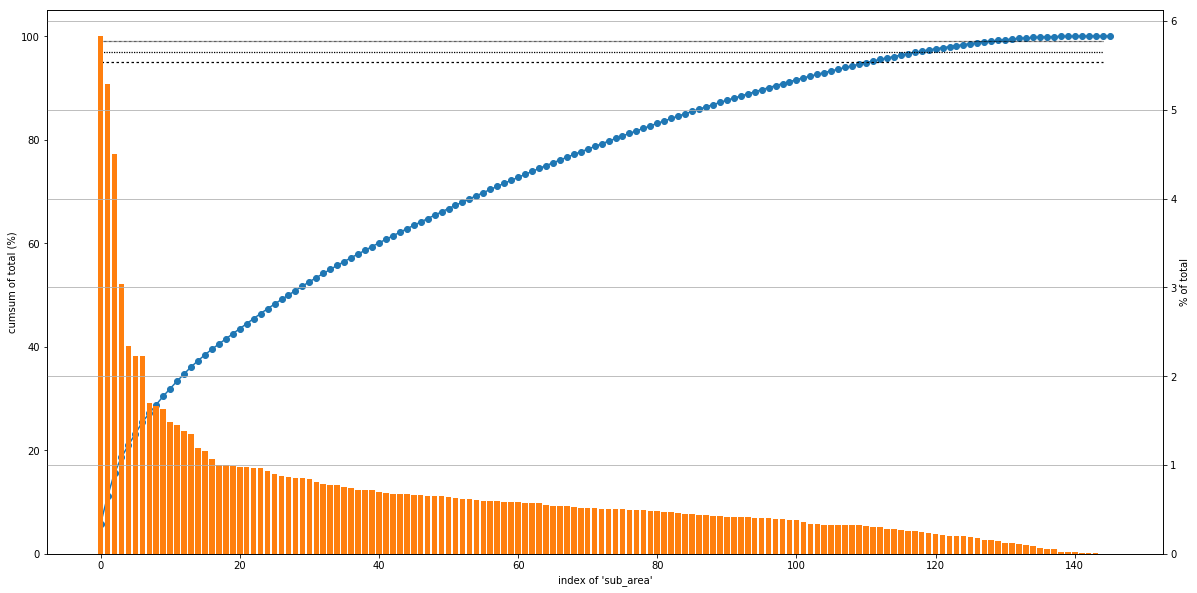

In [27]:
fig, ax = plt.subplots(1,1,figsize=[20,10])
ax.plot(csum,'o-')
ax.plot([0,144],[99,99],'k--', dashes=[0.5,0.5], linewidth=1.25)
ax.plot([0,144],[97,97],'k--', dashes=[1.0,1.0], linewidth=1.25)
ax.plot([0,144],[95,95],'k--', dashes=[2.0,2.0], linewidth=1.25)
ax.set_ylabel('cumsum of total (%)')
ax.set_ylim(0,105)
ax1=ax.twinx()
ax1.bar(x=df_cnts.index, height=df_cnts['%'].values, color='C1')
ax1.set_ylabel('% of total')
ax1.grid()
ax.set_xlabel('index of \'sub_area\'');

In [28]:
cats_to_exclude = []
counts = 0
for n,r in df_cnts.sort_values('sub_area').iterrows():

    if counts/num_rows > 0.05:
        print(counts, counts/num_rows)
        break
    counts += r['sub_area']
    cats_to_exclude.append(r['index'])

1560 0.05119621935610909


In [29]:
cats_to_exclude

['Poselenie Klenovskoe',
 'Poselenie Mihajlovo-Jarcevskoe',
 'Poselenie Shhapovskoe',
 'Poselenie Kievskij',
 'Molzhaninovskoe',
 'Poselenie Marushkinskoe',
 'Poselenie Voronovskoe',
 'Vostochnoe',
 'Arbat',
 'Poselenie Mosrentgen',
 'Poselenie Kokoshkino',
 'Poselenie Krasnopahorskoe',
 'Poselenie Rogovskoe',
 'Poselenie Rjazanovskoe',
 "Krasnosel'skoe",
 'Severnoe',
 'Vnukovo',
 'Kapotnja',
 "Zamoskvorech'e",
 'Dorogomilovo',
 'Metrogorodok',
 "Sokol'niki",
 'Begovoe',
 'Kurkino',
 'Rostokino',
 "Altuf'evskoe",
 'Sokol',
 'Nizhegorodskoe',
 'Gagarinskoe',
 'Ostankinskoe',
 'Jakimanka',
 'Savelovskoe',
 'Marfino',
 'Hamovniki',
 'Staroe Krjukovo']